In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
df=load_diabetes()

In [8]:
X=df.data
y=df.target

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [12]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2",r2_score(y_test,y_pred))

MSE 48.72710829141399
R2 0.5188118914964637


In [19]:
R=Ridge(alpha=0.01)
modelR=R.fit(X_train,y_train)
y_predR=modelR.predict(X_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predR)))
print("R2",r2_score(y_test,y_predR))

RMSE 48.51027804490331
R2 0.5230848310448115


# Visualization if m value is high or low

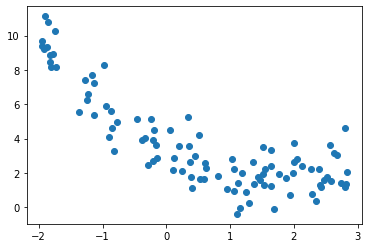

In [22]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

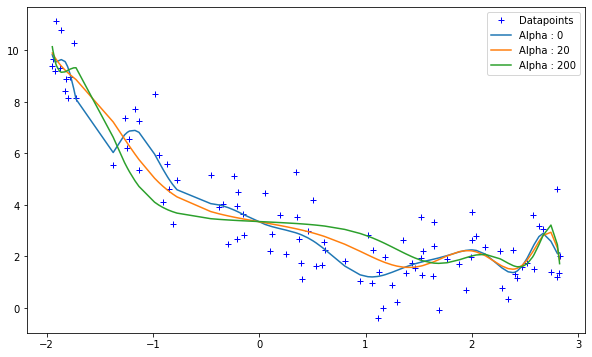

In [24]:
from sklearn.preprocessing import PolynomialFeatures
def get_pred_ridge(x1,x2,alpha):
    model=Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas=[0,20,200]
cs=['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha, c in zip(alphas,cs):
    pred=get_pred_ridge(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]),pred[np.argsort(x1[:,0])],label='Alpha : {}'.format(alpha))

plt.legend()
plt.show()